# TensorFlow Regression Example

## Creating Data

In [262]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [263]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [264]:
noise = np.random.randn(len(x_data))

In [285]:
# y = mx + b + noise_levels
b = 10

y_true =  (2.5 * x_data ) + 15 + noise

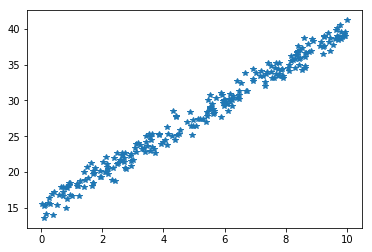

In [331]:
sample_indx = np.random.randint(len(x_data),size=(250))
plt.plot(x_data[sample_indx],y_true[sample_indx],'*')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [332]:
import tensorflow as tf

In [333]:
# Random 10 points to grab
batch_size = 10

**Variables**

In [334]:
w_tf = tf.Variable(np.random.uniform())
b_tf = tf.Variable(np.random.uniform(1,10))

**Placeholders**

In [335]:
x_train = tf.placeholder(tf.float32,shape=(batch_size))
y_train = tf.placeholder(tf.float32,shape=(batch_size))

**Graph**

In [336]:
y_hat = w_tf * x_train + b_tf

**Loss Function**

In [337]:
error = tf.reduce_sum((y_train - y_hat)**2)

**Optimizer**

In [338]:
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(error)

**Initialize Variables**

In [339]:
init = tf.global_variables_initializer()

### Session

In [340]:
with tf.Session() as sess:
    sess.run(init)
    batchs = 1000
    for i in range(batchs):
        batch_index = np.random.randint(len(x_data),size=(batch_size))
        feed = {x_train:x_data[batch_index], y_train:y_true[batch_index]}
        sess.run(train,feed_dict = feed)
    final_w, final_b = sess.run([w_tf,b_tf])

### Results

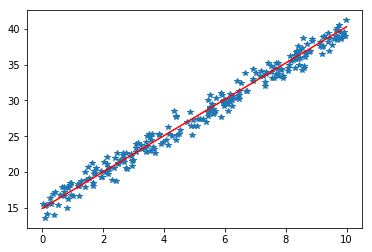

In [343]:
plt.plot(x_data[sample_indx],y_true[sample_indx],'*')
plt.plot(x_data, final_w*x_data+final_b,'r')

### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3)

In [303]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


In [304]:
sample_indx = np.random.randint(len(x_eval),size=(250))

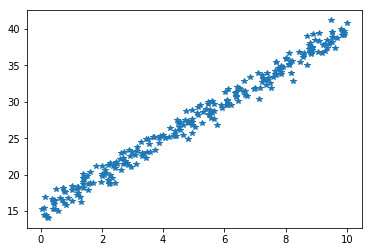

In [305]:
plt.plot(x_eval[sample_indx],y_eval[sample_indx],'*')

## tf.keras API

In [317]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**Program Keras Model**

In [318]:
model = Sequential()
model.add(Dense(1,input_shape = (1,)))

**Setup Optimizer**

In [319]:
sgd = SGD(0.001)

**Compile Model**

In [320]:
model.compile(loss='mse', optimizer=sgd, metrics=['mse'])

In [321]:
H = model.fit(x_train, y_train, epochs = 1,batch_size = 32)

Epoch 1/1
700000/700000 [==============================] - 27s 38us/step - loss: 3.7510 - mean_squared_error: 3.7510


In [322]:
w_final, b_final = model.get_weights()

In [324]:
print(w_final[0])

[2.5086308]


In [325]:
print(b_final)

[14.990834]


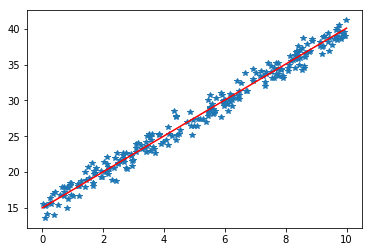

In [344]:
plt.plot(x_data[sample_indx],y_true[sample_indx],'*')
plt.plot(x_data, w_final[0]*x_data+b_final,'r')

In [254]:
y_pred = model.predict(x_eval)

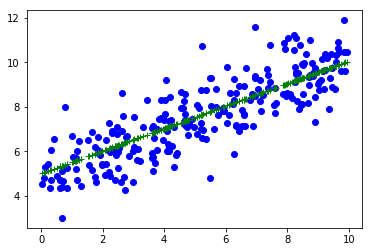

In [255]:
plt.plot(x_eval[sample_indx],y_eval[sample_indx],'bo',
        x_eval[sample_indx],y_pred[sample_indx],'g+')

# Great Job!